In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import sys


sys.path.append('../src/Python')

from utils import *
from plot_utils import *
from hce_framework import HCE, rHCE, get_best_hce_level


# plt.rcParams['figure.dpi'] = 300 

# Help functions

In [2]:
Rt = lambda x, v: (
    np.array(
        [[np.cos(x), -np.sin(x)], [np.sin(x), np.cos(x)]] 
    ) @ v.reshape(-1, 1)).reshape(-1,)                      # Rotate vector v by angle x
Ty = lambda v: np.array([v[0] , -v[1]])                     # Reflect vector v across the x-axis
Tx = lambda v : np.array([-v[0] , v[1]])                    # Reflect vector v across the y-axis

# Example with the Karate club dataset

In [3]:
G = nx.karate_club_graph()                               # Load the Karate Club graph
community_labels = {"Mr. Hi" : 0, "Officer" : 1}
node_communities1 = np.array([community_labels[G.nodes[u]["club"]] for u in G.nodes])

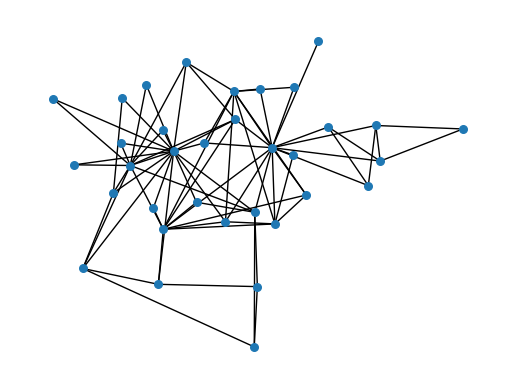

In [4]:
pos = nx.kamada_kawai_layout(G)
pos = {n : Rt(120 * np.pi / 180, pos[n]) for n in G.nodes}
pos = {n : Tx(pos[n]) for n in G.nodes}
pos = {n : Ty(pos[n]) for n in G.nodes}

nx.draw_networkx_nodes(G, pos=pos, node_size=30)
nx.draw_networkx_edges(G, pos=pos)

sns.despine(left=True, bottom=True)

In [5]:
N = len(G.nodes)
A = nx.adjacency_matrix(G).toarray()
A[A > 0] = 1
D = compute_dissimilarity_matrix(A)
H = linkage(D, method="average")

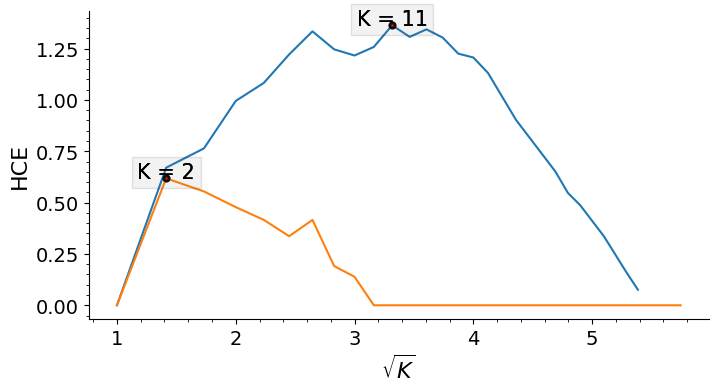

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
rn = 0      # Renormalization level
while True:
    if rn == 0:
        hce = HCE(H, (H.shape[0] + 1))
    else:
        hce = rHCE(H, (H.shape[0] + 1), rN)
    rN, _ = get_best_hce_level(hce)
    draw_HCE(
        hce,
        linewidth=2,
        fontticklabelsize=14,
        fontlabelsize=16,
        fonttextsize=15,
        f=np.sqrt,
        xlabel=r"$\sqrt{K}$",
        ax=ax
    )
    if rN == 2:
        break
    rn += 1

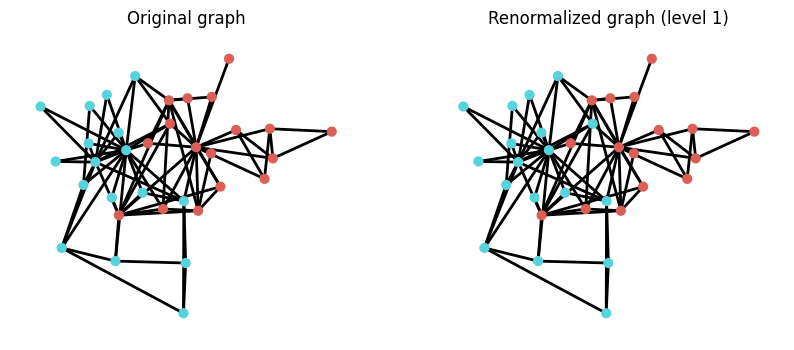

In [14]:
_, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].set_title("Original graph", fontsize=12)
plot_network_linkage(G, H, nc=2, pos=pos, node_communities=node_communities1, node_size=40, linewidth=2, ax=axes[0])

axes[1].set_title(f"Renormalized graph (level 1)", fontsize=12)
plot_network_linkage(G, H, nc=2, pos=pos, node_communities=None, node_size=40, linewidth=2, ax=axes[1])

# Hierarchical Nested Random Graph (HNRG)

In [ ]:
N = 10 # Number of nodes of the finest level
R = 3  # Branching factor
L = 3  # Number of levels
hnrg_model = HNRG(N, R, L, seed=0)